In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
def spines(axes = None):
    if axes==None:
        axes = plt.gca()
    dict(axes.spines.items())["left"].set_position(('outward', 10))
    dict(axes.spines.items())["bottom"].set_position(('outward', 10))
    dict(axes.spines.items())["top"].set_position(('outward', 10))
    dict(axes.spines.items())["right"].set_position(('outward', 10))

In [2]:
import pickle

In [71]:
matplotlib.rc("font", **{"size":20})

In [20]:
with open("Samples/May 25 2016/21-58-06/xmons-first-try-5th-res.pkl", "rb") as f:
    data5 = pickle.load(f)[1]

In [10]:
with open("Samples/May 25 2016/22-28-58/xmons-first-try-1st-res.pkl", "rb") as f:
    data1 = pickle.load(f)[1]

In [26]:
with open("Samples/May 25 2016/17-49-07/xmons-first-try-6th-res-zoom.pkl", "rb") as f:
    data6 = pickle.load(f)[1]

In [16]:
with open("Samples/May 25 2016/18-06-00/xmons-first-try-2nd-res-anticrossings.pkl", "rb") as f:
    data2 = pickle.load(f)[1]

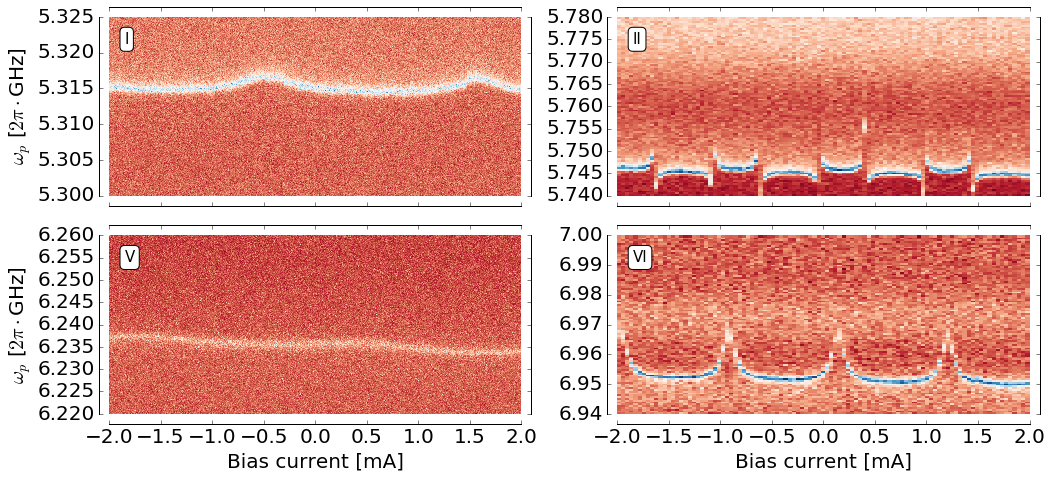

In [75]:
fig, axes = plt.subplots(2,2, figsize = (15, 7))
data = [data1, data2, data5, data6]
letters = ["I", "II", "V", "VI"]

for idx, ax in enumerate(flatten(axes)):
    ax.pcolormesh(data[idx][0]*1e3, data[idx][1]/1e9, data[idx][2].T, cmap="RdBu_r", rasterized=True)
    ax.autoscale(tight=True)
#     ax.yaxis.set_major_locator(MaxNLocator(4))
    spines(ax)
    
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    ax.text(-1.85, (ax.get_ylim()[1]-ax.get_ylim()[0])*0.85+ax.get_ylim()[0], letters[idx], bbox=props, fontsize=15)

    if idx<2:
        ax.xaxis.set_ticklabels([])
    else:
        ax.set_xlabel("Bias current [mA]")
    if idx%2==0:
        ax.set_ylabel(r"$\omega_p$ [$2\pi\cdot$GHz]")

plt.tight_layout()

plt.savefig("Pictures/first_resonators_on_flux.pdf",  bbox_inches="tight")